## Importing Modules/Library for Data Analysis


This part will import all of the modules and gather all the modules that will be used for the elaborated processing of the data. 

In [3]:
# Import required libraries
# For analysis:
import numpy as np
import pandas as pd  # might require 'pip install openpyxl' to read Excel files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# For plotting:
import matplotlib.pyplot as plt
import seaborn as sns



import xgboost as xgb

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from scipy.stats import zscore

## Importing Dataset of the Business Case: Marketing Effort/Campaign for Deposit in a Term

This part will import/load the dataset for the business case. In this specific dataset, it requires a delimiter ";" to separate between columns, so that it can distinguish one value of column to another. 

In [6]:
hfloan = pd.read_csv('bank-additional-full.csv', delimiter = ';')

Checking the dataset that has been loaded, seeing all the values and columns are shown accordingly. 

In [8]:
hfloan

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Data Preparation: Checking the Imported Data and Prepare before analysing the Data that has been imported

Sampling the first five index of the data, to see/check the top part of the data

In [11]:
hfloan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


It is seen that the response will show the first five index/data from the top of the data, to see/sample the data inside the dataset 

After that, we want to summarise the profile/character of the DataFrame, providing information such as:
1. Number of Entries 
2. Column names and data types 
3. Null Value Check of the Data Set 
4. The total of memory usage of the dataframe 

In [14]:
hfloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Data Cleaning: Cleaning the Data based on the Findings and Insights of the previous peek/info of the data 

After the quick look of the dataframe profile/characters, it is seen that the target of analysis which is "y", which is interpreted 
as the decision whether a customer decided to put deposit from the marketing effort shown as boolean. To include it for the data analysis
and processing it needs to be converted to numerical value (encoding).

### Mapping The Target Column (y) to numerical value (1 and 0)

In [18]:
hfloan['y']=hfloan['y'].map({'yes':1,'no':0})


As we want to process the dataset, and see the analysis/predict the output if they wish to put a deposit or not, we need to process the
data in a numerical value, as example we are going to do modelling with method such as "XG Boost", "Random Forest", and "KNN", which require numerical value as the input.

### Mapping the negative value for "pdays" column to positive value (0)

Similarly to the previous process, we are going to convert the value of "-1" from the column of "pdays" to zero as it can be misinterpreted when modeling it out with methods such as "Decision Tree", "Random Forest", and "XG Boost". Therefore we will interpret the value as "0" for customers that were not previously contacted previosly. 

In [22]:
hfloan.pdays[hfloan.pdays==-1]=0


/var/folders/zg/yn24kcq50d5c7fd5b2srdz840000gn/T/ipykernel_16834/1255215777.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  hfloan.pdays[hfloan.pdays==-1]=0
/var/folders/zg/yn24kcq50d5c7fd5b2srdz840000gn/T/ipykernel_16834/1255215777.py:1

### Validating the Data Condition/Attributes/Values

After some of the columns have been mapped out, we can see the statistical value and information of all of numerical column that we have
produced. The aim of this process is to:
1. See the quick summary of the dataset 
2. detect any missing values 
3. See profile such as median or outliers

In [25]:
hfloan.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Subsequently, we want to check the values of each numerical value/column that we are going to use for the latter process. The purpose is to see which column is "Numerical" and which column is "categorical". 

In [27]:
hfloan.nunique().sort_values(ascending=True)


y                    2
contact              2
default              3
housing              3
loan                 3
poutcome             3
marital              4
day_of_week          5
education            8
previous             8
emp.var.rate        10
month               10
nr.employed         11
job                 12
cons.price.idx      26
cons.conf.idx       26
pdays               27
campaign            42
age                 78
euribor3m          316
duration          1544
dtype: int64

From the output above, we can see if some of the columns are categorical and some are numerical:
1. The "y" column or the value that tells customers to put a deposit or not is categorical, since the value is whether yes (1) or no (0)
2. Same type of value is also found in "contact", "default", and "housing"
3. another column such as "duration" and "age" may be continuous numerical values as it can produce a lot of variation.

Based on these findings, we are most likely to use the "Classification Model" for the prediction, as the column target "y" is a categorical value"

Moreover, we want to check the existing null values in the data set, to see if further data pre-processing is required or not.

In [30]:
hfloan.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Since the data is looking clean and does not really have null value, it is reliable enough to be used for further processing/modelling. With 
this findings we can be more confident not to do "Impute" towards null values or have a model error in the latter process due to null values. 

## Correlation Matrix: Analysie the Correlation of each Collumn towards the target / "y"

Pearson correlation coefficients between numerical features in the Airbnb dataset help identify relationships between variables. Values range from -1 to 1, where values closer to ±1 indicate stronger relationships. Therefore, we can see other columns that significantly/strongly affect the determination of "y" based on the correlation coefficients (between -1 to 1)

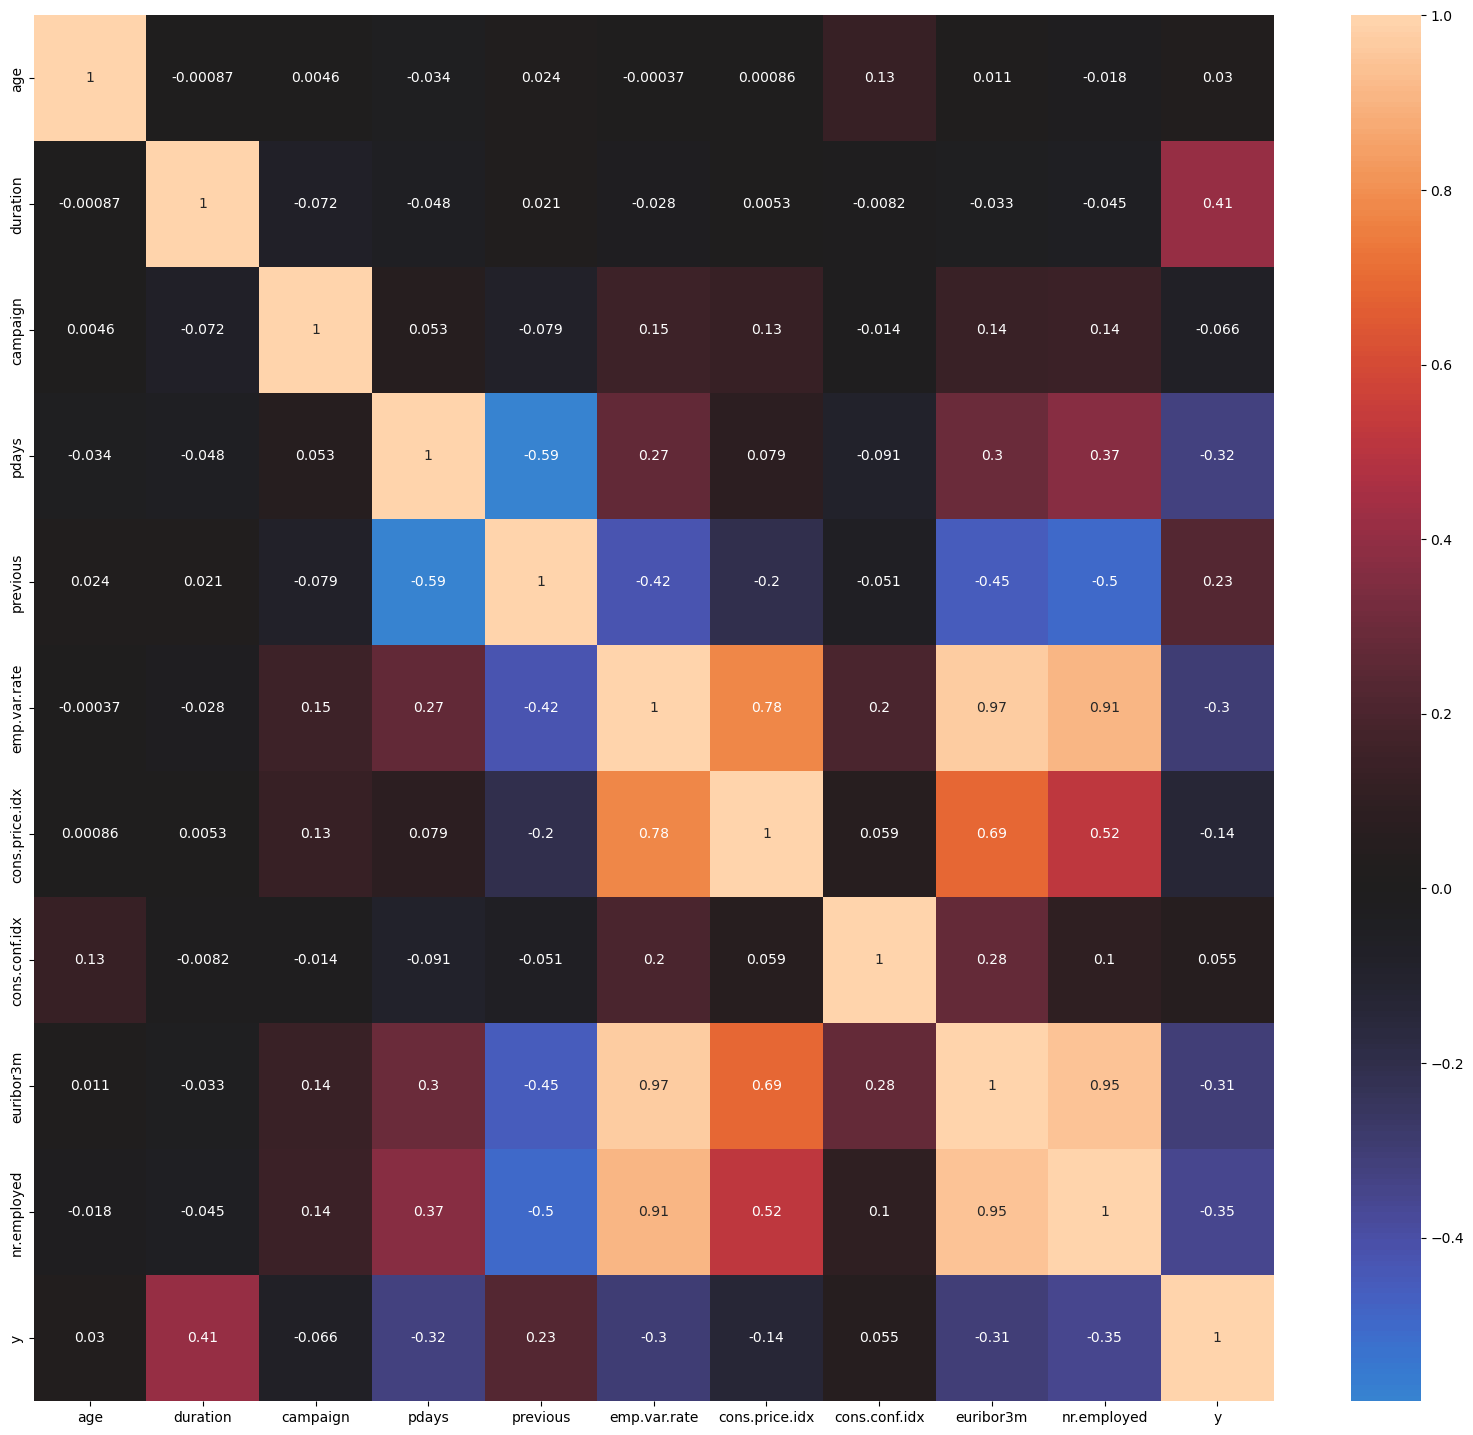

In [34]:
plt.figure(figsize=(20,18))
sns.heatmap(hfloan.select_dtypes(include=['int','float']).corr(),annot=True,center = 0)
plt.show()

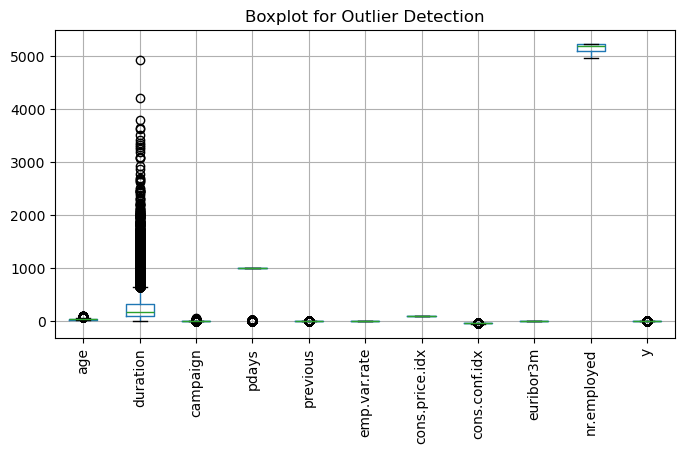

In [35]:
# Select numerical columns
numerical_cols = hfloan.select_dtypes(include=['number']).columns

# Plot boxplots for each numerical column
plt.figure(figsize=(8, 4))

# Rotate labels for better visibility
hfloan[numerical_cols].boxplot(rot=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

### Removing Multicolinearity/Redundancy of Variables

As seen and interpreted in the previous findings, Pdays represents days since the previous contact, and there is another column called "previous"
that also provides the same information if the customer has been previously contacted or not. Since both columns can provide the same significance
or meaning, we can remove one of the columns, so that it won't be redundant and affect the output due to multicollinearity. This process can help to improve the model output and accuracy. 

In [38]:
del hfloan['pdays']#removing pdays to avoid multicollinearity


Since the "previous" column is more positive and also significant, it is a lot easier to use it instead of the "pdays" column. Hence we can drop/delete the column for further analysis. 

### Data Distribution of Target Variables

In this part we are going to see the distribution of data from each numerical values towards "y" as the target of the analysis. 

/var/folders/zg/yn24kcq50d5c7fd5b2srdz840000gn/T/ipykernel_16834/2545320431.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hfloan,x='y', y=col, ax=ax,edgecolor="black",palette='viridis_r')
/var/folders/zg/yn24kcq50d5c7fd5b2srdz840000gn/T/ipykernel_16834/2545320431.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hfloan,x='y', y=col, ax=ax,edgecolor="black",palette='viridis_r')
/var/folders/zg/yn24kcq50d5c7fd5b2srdz840000gn/T/ipykernel_16834/2545320431.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hfloan,x='y', y=

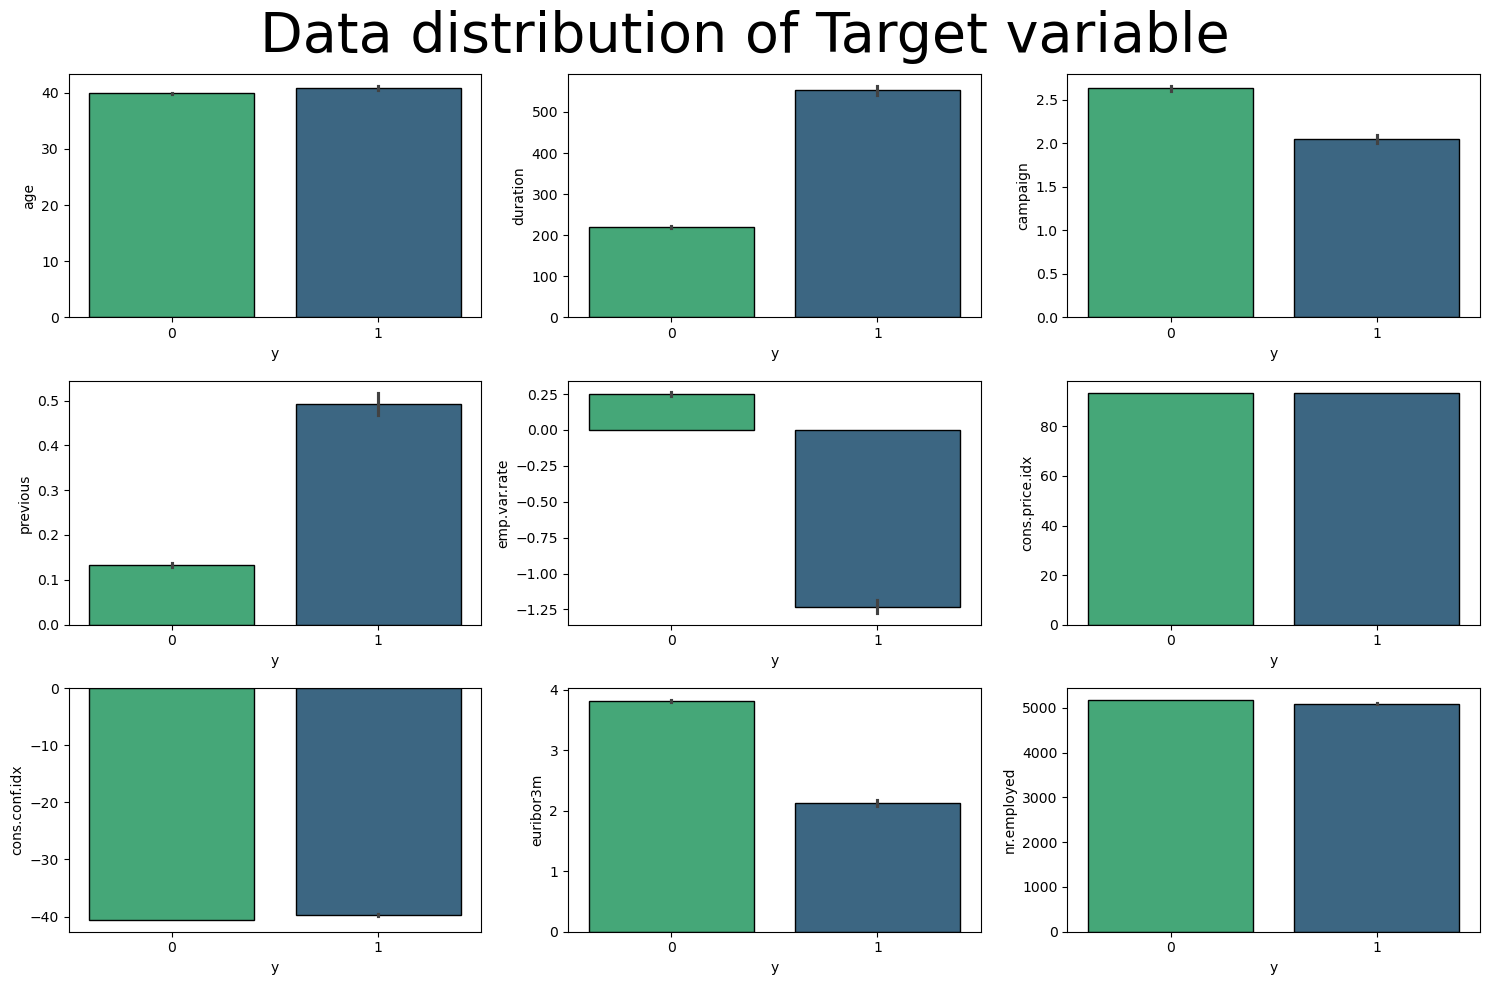

In [42]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(hfloan.drop(['y'],axis=1).select_dtypes(include=['int','float']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(3,3, i+1)
    sns.barplot(data=hfloan,x='y', y=col, ax=ax,edgecolor="black",palette='viridis_r')
font= {'fontsize':25,'color': 'grey'}
plt.suptitle('Data distribution of Target variable',fontsize=40)
plt.tight_layout()

The findings above show some trends of each variables affecting the determination of "y" as example:
1. previous (number of previous contacts) is much higher for y=1, meaning past contact history could influence outcomes.
2. cons.price.idx (Consumer Price Index) looks nearly identical for y=0 and y=1, suggesting it may be a weak predictor.

Moreover, we want to see the distribution of the data of "y" column/target, to see if they are balance or not. If the data is imbalance, we need to perform further processing, so that the model can have better accuracy and prevent:
1. Biased prediction
2. Misleading Accuracy
3. Incorrect Minority Class Recall

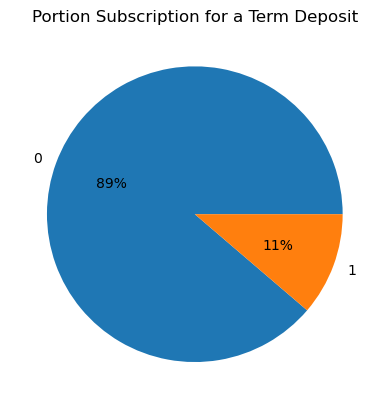

In [45]:
checkVariable=pd.crosstab(index=hfloan['y'],columns='% observations')
plt.pie(checkVariable['% observations'],labels=checkVariable['% observations'].index,autopct='%.0f%%')
plt.title('Portion Subscription for a Term Deposit')
plt.show()

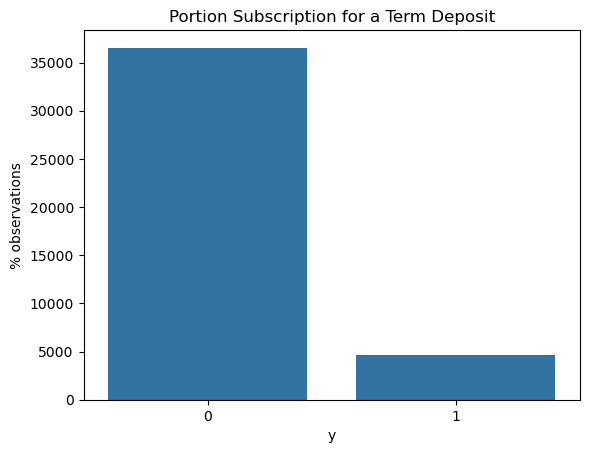

In [46]:
sns.barplot(x=checkVariable.index,y=checkVariable['% observations'])
plt.title('Portion Subscription for a Term Deposit')
plt.show()

From the analysis above, it is shown that there is an imbalance between the y value of "0" and "1", where the majority of data (89%) belongs to 0. Therefore we are going to perform SMOTE processing to balance the data by producing or balancing the amount of data by producing a synthetic example of a minority sample. 

## Encoding Data Attributes/Columns 

In [49]:
hfloan_encoded=pd.get_dummies(hfloan,drop_first=True)#applying One-Hot Encoding



In this part, we are going to see what columns we need to encode/convert categorical variables (can be boolean) into numerical values. This processing is needed as the classification model such as "Random Forest" cannot process categorical value type. 

In [51]:
print(hfloan_encoded.dtypes)

age                                int64
duration                           int64
campaign                           int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                  int64
job_blue-collar                     bool
job_entrepreneur                    bool
job_housemaid                       bool
job_management                      bool
job_retired                         bool
job_self-employed                   bool
job_services                        bool
job_student                         bool
job_technician                      bool
job_unemployed                      bool
job_unknown                         bool
marital_married                     bool
marital_single                      bool
marital_unknown                     bool
education_basic.

After the encoding, compared to the previous type of columns/table information, we can see that some of the categorical values are converted into separate columns and translated into numerical values "0" or "1" (boolean). Therefore, we can process this encoded data.

In [53]:
numerical_cols = hfloan_encoded.select_dtypes(include=np.number).columns


## Removing Outlier

In this part we are going to remove some quartiles, as previously we found some quartiles in certain columns. 

In [56]:
# Select numerical columns
numerical_cols = hfloan_encoded.select_dtypes(include=np.number).columns

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = hfloan_encoded[numerical_cols].quantile(0.25)
Q3 = hfloan_encoded[numerical_cols].quantile(0.75)

# Interquartile Range
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
hfloan_cleaned = hfloan_encoded[~((hfloan_encoded[numerical_cols] < lower_bound) | (hfloan_encoded[numerical_cols] > upper_bound)).any(axis=1)]

In [57]:
hfloan_encoded.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,True,False,False,False,True,False,False,False,True,False


In [58]:
hfloan_encoded.nunique().sort_values(ascending=True)


education_high.school               2
education_professional.course       2
education_university.degree         2
education_unknown                   2
default_unknown                     2
default_yes                         2
housing_unknown                     2
housing_yes                         2
loan_unknown                        2
loan_yes                            2
contact_telephone                   2
month_aug                           2
month_dec                           2
month_jul                           2
month_jun                           2
month_mar                           2
month_may                           2
month_nov                           2
month_oct                           2
month_sep                           2
day_of_week_mon                     2
day_of_week_thu                     2
day_of_week_tue                     2
day_of_week_wed                     2
education_illiterate                2
poutcome_nonexistent                2
poutcome_suc

Data information after data processing, and the type of values. It is shown that most of the columns have 
been encoded and contain numerical values "0" or "1", which is good for modeling or processing.

## Data Modelling: Classification Model

In this part, we are going to prepare the data that has been processed for the modeling. As mentioned in previous findings due to the nature
of the objective (target == "y") we want to perform classification model to identify/predict whether customers contacted through marketing 
efforts are willing to put a deposit or not. 

In this part, we are preparing the X variables as the features/predictors and y as the target variables. Therefore we are dropping the 'y' column for the X variable as we want to use it as our target for variable y. 

In [63]:
X=hfloan_encoded.drop(['y'],axis=1)
y=hfloan_encoded['y']

In [64]:
X.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False


As you can see, from the preview above, the X variable keeps all of the features/predictors that we are going to use for the modelling.

## Importing Modules and Preparing Most Important Features

In [120]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X.values, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X.values)

The script above represents:
1. Importing Extra Tree Classifier, as we want to use a tree-based model so that we can compare linear and non-linear relationships and can reduce impurity as it features the most "pure" splits. It also randomly selects features and reduces bias as it averages across multiple trees for stable feature importance ranking
2. We use 100 trees as it balances out the speed, accuracy, and split (i.e 1000 is too much, but 50 is too few)
3. The fit method trains the X values (features/predictor) and y as the target
4. The feature importances feature stores the importance of each feature parameter from x. It will Prioritize high-importance features in model tuning for better predictions.
5. The function of the model is as a selector, that selects/keeps the best feature based on feature importance and already fit as true so that it uses the features without re-training the model.
6. Finally, it produces X_new, which only refers/transform to features that are significant/important 

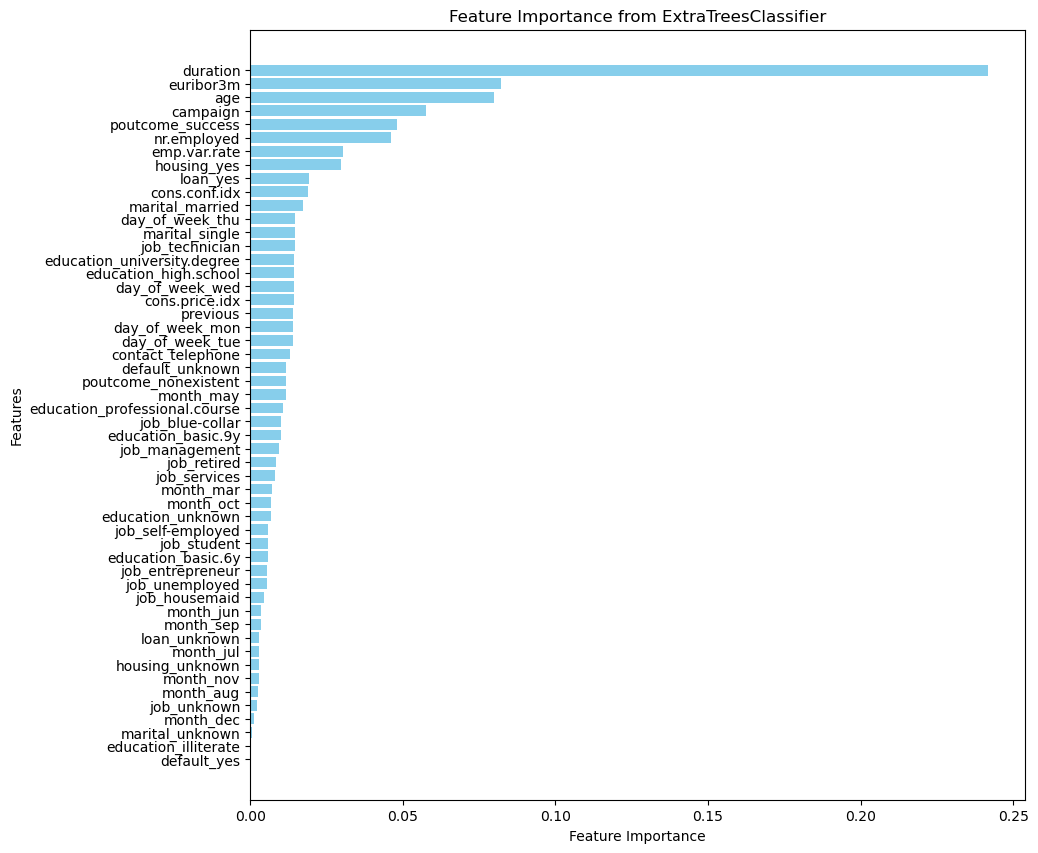

In [128]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,  # Assuming X is a pandas DataFrame
    'Importance': clf.feature_importances_
})

# Sort features by importance for better visualization
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from ExtraTreesClassifier')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

The feature importance that is stored based on variable X will be shown as visualized above. The higher the importance, the better it will tune the model for better output/prediction.

### Preparing Testing and Training Data

In this part, we are going to prepare test sizes by splitting the data based on the ratio that we have defined. In this context, we set the test size as 25% and use the remaining (75%) for training data. The overall process can be seen below. 

In [74]:
from sklearn.model_selection import train_test_split


In [76]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,stratify=y,random_state=0)


The reason we choose 25% is because it is sufficient for a larger dataset (enough data for testing)
X_new (Features) is split into X_train and X_test
X_train: 75% of X_new (used for training the model).
X_test: 25% of X_new (used for testing the model).
y (Target) is split into y_train and y_test
y_train: 75% of y (matches X_train).
y_test: 25% of y (matches X_test).

### Imbalance Data Treatment/Processing: SMOTE Implementation

As previously mentioned there is an imbalance inside the data. Therefore we have to process the data with SMOTE to balance out the data by selecting a random point from the minority class (that needs to be balanced out) and finding its nearest neighbors from the same class. Finally, it will generate synthetic data points by interpolating between the selected point and its neighbors, resulting in balanced data.



In [78]:
from imblearn.over_sampling import SMOTE


In [80]:
sm = SMOTE(sampling_strategy='auto', random_state=42)


In [82]:
X_train,y_train=sm.fit_resample(X_train,y_train)


As you can see from the script above, it retrain/re-fit the X_train and y_train (the training data with the SMOTE) so that it can identify
the data points (minority points) that need to be balanced out, and automatically fix the data conditions for training.

In [84]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

The script above uses Standard Scaler so that we can have zero mean and unit variance which can improve the model variance. The StandardScaler will apply towards X_train and X_test as they are the input for the prediction.

READ: Since the "y" or target is classification (yes/no) it does not need StandardScaler applied, unlike in regression problems.

## Main Modeling: Decision Tree, XG Boost, Random Forest, KNN

### Importing the Classification Models

Firstly we must import all the needed modules/library for the modelling, including Decision Tree, KNN, Random Forest, and XG Boost.

In [86]:
#importing different classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

For formatting, we will create a dictionary to collect and summary all the model performance 

In [88]:
#creating dictionary for storing different models accuracy
model_comparison={}

### Classification Model 1: Decision Tree

- Why Use It? Because the relation between the target (y) and features/predictors are non-linear
- Since the data has been balanced, it is not a problem to use a decision tree (there won't be bias)
- It fits the case study, as a decision tree can help to define and identify the predictors that lead to the target (y), which classifies whether users are depositing or not from the marketing campaign

In [90]:
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,scoring="recall")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Decision Tree']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]


Model Accuracy : 88.67%
Model F1-Score : 88.52%
Cross Val Accuracy: 91.46 %
Cross Val Standard Deviation: 14.29 %
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      9064
           1       0.53      0.50      0.51      1233

    accuracy                           0.89     10297
   macro avg       0.73      0.72      0.72     10297
weighted avg       0.88      0.89      0.89     10297



In [92]:
cm = confusion_matrix(y_test, y_pred)

# Extract FP & FN for binary classification
FP = cm.sum(axis=0) - np.diag(cm)  # Column sum minus diagonal (False Positives)
FN = cm.sum(axis=1) - np.diag(cm)  # Row sum minus diagonal (False Negatives)

# Total number of FP and FN
total_FP = FP.sum()
total_FN = FN.sum()

print(f"False Positives (FP): {total_FP}")
print(f"False Negatives (FN): {total_FN}")

False Positives (FP): 1167
False Negatives (FN): 1167


### Classification Model 2: KNN

- Why Use It? Works well for non-linear relationships and has moderate size data as the model is considered slower to other
- Since we have already implemented feature-scaling we can implement KNN (it's distance-based)
- It fits the case study, as a decision tree can help to define non-linear problem/relationship 

### Choosing the Best K Neighbour Value

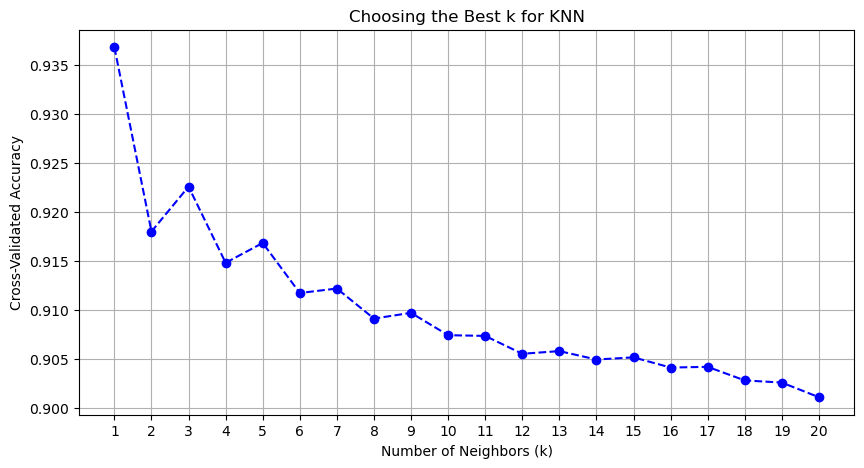

Best k: 1 with Accuracy: 0.9368


In [106]:
# Define range of k values to test
k_values = range(1, 21)
cv_scores = []

# Perform cross-validation to find best k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Find the best k
best_k = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

# Plot the accuracy vs k values
plt.figure(figsize=(10,5))
plt.plot(k_values, cv_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Choosing the Best k for KNN')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Print the best k value
print(f'Best k: {best_k} with Accuracy: {best_score:.4f}')

In [118]:
classifier = KNeighborsClassifier(n_neighbors=1)  # Insert result with k=1
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['KNN']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 88.63%
Model F1-Score : 88.22%
Cross Val Accuracy: 93.68 %
Cross Val Standard Deviation: 1.34 %
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      8924
           1       0.59      0.50      0.54      1373

    accuracy                           0.89     10297
   macro avg       0.76      0.72      0.74     10297
weighted avg       0.88      0.89      0.88     10297



In [96]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract False Positives (FP) and False Negatives (FN)
FP = cm.sum(axis=0) - np.diag(cm)  # Sum of column elements minus true positives
FN = cm.sum(axis=1) - np.diag(cm)  # Sum of row elements minus true positives

# Print results
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

False Positives (FP): [320 966]
False Negatives (FN): [966 320]


### Classification Model 3: Random Forest

- Why Use It? Since the case requires us to find what defines/predicts "y" it can automatically rank the features. 
- It can reduce overfitting, resulting in a generalized model.
- Performs well on categorical and numerical datasets.

In [98]:
classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Random Forest']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 90.40%
Model F1-Score : 90.56%
Cross Val Accuracy: 93.55 %
Cross Val Standard Deviation: 6.38 %
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      9217
           1       0.54      0.58      0.56      1080

    accuracy                           0.90     10297
   macro avg       0.74      0.76      0.75     10297
weighted avg       0.91      0.90      0.91     10297



### Classification Model 4: XG Boost

- Why Use It? Since the case requires us to find what defines/predicts "y" it can automatically rank the features. 
- XGBoost captures non-linear patterns and feature interactions better than simpler models like Logistic Regression, fitting the output/expectation of the business problem.
- It works well with data imbalance.

In [102]:
classifier = XGBClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Xg Boost']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 90.93%
Model F1-Score : 90.91%
Cross Val Accuracy: 92.09 %
Cross Val Standard Deviation: 9.21 %
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9127
           1       0.60      0.60      0.60      1170

    accuracy                           0.91     10297
   macro avg       0.78      0.77      0.77     10297
weighted avg       0.91      0.91      0.91     10297



## Model Summary

In [116]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Greens')

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Xg Boost,90.93%,90.91%,92.09%,9.21%
Random Forest,90.40%,90.56%,93.55%,6.38%
KNN,89.43%,89.56%,91.80%,2.52%
Decision Tree,88.67%,88.52%,91.46%,14.29%


## Insight

1. XG Boost is the best performing among the other models, when it comes to accuracy, but slightly has a lower standard deviation,
indicating some variability in performance across different validation sets.
2. Random Forest is the best performing among other models, when it comes to standard deviation, but slightly has a lower accuracy compared to XG Boost.
3. KNN is quite stable but might be inefficient for larger datasets due to its nature.
4. Decision Tree output is considered lower in accuracy compared to XG Boost and Random Forest, but it has the highest standard deviation which may result in overfitting and bad generalization.
